In [475]:
from google.colab import drive

drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [476]:
%cd "/content/drive/Othercomputers/Vignesh MacBook Air/Kaggle-Comp-1"

/content/drive/Othercomputers/Vignesh MacBook Air/Kaggle-Comp-1


In [477]:
# Essential Libraries
import os
import re
import numpy as np
import pandas as pd

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Matplotlib Settings
plt.style.use("ggplot")
plt.rcParams["figure.dpi"] = 100

In [478]:
# Replace with your actual file path
csv_path = "russian-car-plates-prices-prediction/train.csv"

# Read the CSV into a DataFrame
df = pd.read_csv(csv_path)

df

,id,plate,date,price
0,1,X059CP797,2024-12-26 00:00:00,65000
1,2,Y800MH790,2024-07-12 21:31:37,100000
2,3,A212TX77,2024-04-18 00:00:00,290000
3,4,P001AY199,2025-01-03 00:27:15,680000
4,5,P001AY199,2025-01-10 09:32:41,750000
...,...,...,...,...
51630,51631,X023PP797,2025-01-29 00:00:00,70000
51631,51632,M004KA161,2025-01-31 00:00:00,1600000
51632,51633,E888EB199,2025-02-06 00:00:00,850000
51633,51634,X023XK77,2024-04-24 11:30:07,150000


In [479]:
df["date"] = pd.to_datetime(df["date"])
df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month
df["day"] = df["date"].dt.day

In [480]:
df["plate"] = df["plate"].astype(str)
df = df.drop(columns=["date"])
df["plate"] = df["plate"].str.upper().str.strip()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51635 entries, 0 to 51634
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      51635 non-null  int64 
 1   plate   51635 non-null  object
 2   price   51635 non-null  int64 
 3   year    51635 non-null  int32 
 4   month   51635 non-null  int32 
 5   day     51635 non-null  int32 
dtypes: int32(3), int64(2), object(1)
memory usage: 1.8+ MB


In [481]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51635 entries, 0 to 51634
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      51635 non-null  int64 
 1   plate   51635 non-null  object
 2   price   51635 non-null  int64 
 3   year    51635 non-null  int32 
 4   month   51635 non-null  int32 
 5   day     51635 non-null  int32 
dtypes: int32(3), int64(2), object(1)
memory usage: 1.8+ MB


In [482]:
df

,id,plate,price,year,month,day
0,1,X059CP797,65000,2024,12,26
1,2,Y800MH790,100000,2024,7,12
2,3,A212TX77,290000,2024,4,18
3,4,P001AY199,680000,2025,1,3
4,5,P001AY199,750000,2025,1,10
...,...,...,...,...,...,...
51630,51631,X023PP797,70000,2025,1,29
51631,51632,M004KA161,1600000,2025,1,31
51632,51633,E888EB199,850000,2025,2,6
51633,51634,X023XK77,150000,2024,4,24


In [483]:
df[df["id"].duplicated(keep=False)]

,id,plate,price,year,month,day


In [484]:
REGION_CODES = {
    "Republic of Adygea": ["01"],
    "Altai Republic": ["04"],
    "Republic of Bashkortostan": ["02", "102", "702"],
    "Republic of Buryatia": ["03"],
    "Republic of Dagestan": ["05"],
    "Donetsk People's Republic": ["80", "180"],
    "Republic of Ingushetia": ["06"],
    "Kabardino-Balkarian Republic": ["07"],
    "Republic of Kalmykia": ["08"],
    "Karachay-Cherkess Republic": ["09"],
    "Republic of Karelia": ["10"],
    "Komi Republic": ["11"],
    "Republic of Crimea": ["82"],
    "Luhansk People's Republic": ["81", "181"],
    "Republic of Mari El": ["12"],
    "Republic of Mordovia": ["13", "113"],
    "Sakha Republic": ["14"],
    "Republic of North Ossetia": ["15"],
    "Republic of Tatarstan": ["16", "116", "716"],
    "Republic of Tyva (Tuva)": ["17"],
    "Udmurt Republic": ["18"],
    "Republic of Khakassia": ["19"],
    "Chechen Republic": ["20", "95"],
    "Chuvash Republic": ["21", "121"],
    "Altai Krai": ["22", "122"],
    "Zabaykalsky Krai": ["75"],
    "Kamchatka Krai": ["41"],
    "Krasnodar Krai": ["23", "93", "123", "193", "323"],
    "Krasnoyarsk Krai": ["24", "84", "88", "124"],
    "Perm Krai": ["59", "81", "159"],
    "Primorsky Krai": ["25", "125"],
    "Stavropol Krai": ["26", "126"],
    "Khabarovsk Krai": ["27"],
    "Amur Oblast": ["28"],
    "Arkhangelsk Oblast": ["29"],
    "Astrakhan Oblast": ["30", "130"],
    "Belgorod Oblast": ["31"],
    "Bryansk Oblast": ["32"],
    "Vladimir Oblast": ["33"],
    "Volgograd Oblast": ["34", "134"],
    "Vologda Oblast": ["35"],
    "Voronezh Oblast": ["36", "136"],
    "Zaporizhzhia Oblast": ["85", "185"],
    "Ivanovo Oblast": ["37"],
    "Irkutsk Oblast": ["38", "85", "138"],
    "Kaliningrad Oblast": ["39", "91"],
    "Kaluga Oblast": ["40"],
    "Kemerovo Oblast": ["42", "142"],
    "Kirov Oblast": ["43"],
    "Kostroma Oblast": ["44"],
    "Kurgan Oblast": ["45"],
    "Kursk Oblast": ["46"],
    "Leningrad Oblast": ["47", "147"],
    "Lipetsk Oblast": ["48"],
    "Magadan Oblast": ["49"],
    "Moscow Oblast": ["50", "90", "150", "190", "250", "550", "750", "790"],
    "Murmansk Oblast": ["51"],
    "Nizhny Novgorod Oblast": ["52", "152", "252"],
    "Novgorod Oblast": ["53"],
    "Novosibirsk Oblast": ["54", "154", "754"],
    "Omsk Oblast": ["55", "155"],
    "Orenburg Oblast": ["56", "156"],
    "Oryol Oblast": ["57"],
    "Penza Oblast": ["58", "158"],
    "Pskov Oblast": ["60"],
    "Rostov Oblast": ["61", "161", "761"],
    "Ryazan Oblast": ["62"],
    "Samara Oblast": ["63", "163", "763"],
    "Saratov Oblast": ["64", "164"],
    "Sakhalin Oblast": ["65"],
    "Sverdlovsk Oblast": ["66", "96", "196"],
    "Smolensk Oblast": ["67"],
    "Tambov Oblast": ["68"],
    "Tver Oblast": ["69"],
    "Tomsk Oblast": ["70"],
    "Tula Oblast": ["71"],
    "Tyumen Oblast": ["72", "172"],
    "Ulyanovsk Oblast": ["73", "173"],
    "Kherson Oblast": ["84", "184"],
    "Chelyabinsk Oblast": ["74", "174", "774"],
    "Yaroslavl Oblast": ["76"],
    "Moscow": ["77", "97", "99", "177", "197", "199", "777", "797", "799", "977"],
    "Saint Petersburg": ["78", "98", "178", "198"],
    "Sevastopol": ["92"],
    "Jewish Autonomous Oblast": ["79"],
    "Nenets Autonomous Okrug": ["83"],
    "Khanty-Mansi Autonomous Okrug": ["86", "186"],
    "Chukotka Autonomous Okrug": ["87"],
    "Yamalo-Nenets Autonomous Okrug": ["89"],
    "Baikonur": ["94"],
    "Occupational Administration of Kharkiv Oblast": ["188"],
}

# ((letters, numbers range (from, to), region code), is it forbidden to buy (bool), do they have an advantage on the road (bool), level of significance (author's opinion))
GOVERNMENT_CODES = {
    # Moscow
    ("AMP", (0, 999), "97"): ("Government of Russia", 1, 1, 10),
    ("AMP", (0, 999), "77"): ("Partially Government of Russia", 0, 1, 8),
    ("EKX", (0, 999), "77"): (
        "Partially Federal Protective Service (Federal Protective Service)",
        0,
        1,
        6,
    ),
    ("EKX", (0, 999), "97"): (
        "Partially Federal Protective Service (Federal Protective Service)",
        0,
        1,
        6,
    ),
    ("EKX", (0, 999), "99"): (
        "Partially Federal Protective Service (Federal Protective Service)",
        0,
        1,
        6,
    ),
    ("KKX", (0, 999), "77"): (
        "Partially used on vehicles of Ministry of Security/Federal Counterintelligence Service /Federal Security Service of Russia",
        0,
        0,
        1,
    ),
    ("CAC", (500, 999), "77"): (
        "Former officially 'open' plates of Ministry of Security/Federal Counterintelligence Service /Federal Security Service of Russia",
        0,
        0,
        1,
    ),
    ("CAC", (500, 999), "77"): (
        "Former officially 'open' plates of Ministry of Security/Federal Counterintelligence Service /Federal Security Service of Russia",
        0,
        0,
        1,
    ),
    ("AOO", (0, 999), "77"): (
        "Partially Presidential Administrative Directorate plates",
        0,
        1,
        6,
    ),
    ("BOO", (0, 999), "77"): (
        "Partially Presidential Administrative Directorate plates",
        0,
        1,
        6,
    ),
    ("MOO", (0, 999), "77"): (
        "Partially Presidential Administrative Directorate plates",
        0,
        1,
        6,
    ),
    ("COO", (0, 999), "77"): (
        "Partially Administrative Directorate, Federation Council plates",
        0,
        1,
        6,
    ),
    ("AMM", (0, 999), "99"): (
        "Partially plates of Moscow City Duma deputies, police",
        0,
        1,
        4,
    ),
    ("CCC", (0, 999), "77"): (
        "Partially Central Special Communication, Courier Service, Ministry of Communications",
        0,
        1,
        3,
    ),
    ("CCC", (0, 999), "99"): (
        "Partially Tax Police, Customs, Special Communications",
        0,
        1,
        3,
    ),
    ("CCC", (0, 999), "97"): (
        "Partially Central Special Communication, Courier Service, Ministry of Communications",
        0,
        1,
        3,
    ),
    ("KKK", (0, 999), "99"): (
        "Initially belonged to Courier Service, now used among private individuals",
        0,
        0,
        1,
    ),
    ("OOO", (0, 999), "77"): (
        "Initially intended for Federal Security Service",
        0,
        0,
        1,
    ),
    ("KMM", (0, 999), "77"): ("Partially Fire Department plates", 0, 1, 3),
    ("MMP", (300, 320), "77"): ("Partially Federal Security Service plates", 0, 1, 4),
    ("MMP", (0, 299), "77"): (
        "Partially Government of Russia, Federal Security Service, banks, and private individuals with connections in the traffic police",
        0,
        1,
        2,
    ),
    ("MMP", (321, 999), "77"): (
        "Partially Government of Russia, Federal Security Service, banks, and private individuals with connections in the traffic police",
        0,
        1,
        2,
    ),
    ("PMP", (0, 999), "77"): ("Partially Ministry of Justice plates", 0, 1, 3),
    ("AMO", (0, 999), "77"): ("Partially Moscow City Hall plates", 0, 1, 5),
    ("KOO", (0, 999), "77"): ("Partially Constitutional Court plates", 0, 1, 3),
    ("EPE", (0, 999), "77"): ("Partially State Duma plates", 0, 1, 3),
    ("AAA", (0, 999), "77"): (
        "Partially Administration of the President plates",
        0,
        1,
        6,
    ),
    ("KMP", (0, 999), "77"): ("Partially Government of Russia plates", 0, 1, 3),
    ("TMP", (0, 999), "77"): (
        "Partially Government of Russia plates, as well as private individuals with connections in the traffic police",
        0,
        1,
        2,
    ),
    ("YMP", (0, 999), "77"): (
        "Partially Government of Russia plates, as well as private individuals with connections in the traffic police",
        0,
        1,
        2,
    ),
    ("XXX", (0, 999), "77"): (
        "Private individuals with connections in the traffic police",
        0,
        1,
        2,
    ),
    ("YYY", (0, 999), "77"): (
        "Private individuals with connections in the traffic police",
        0,
        1,
        2,
    ),
    ("XKX", (0, 999), "77"): (
        "Partially Federal Security Service and Federal Protective Service plates",
        0,
        1,
        2,
    ),
    ("OMP", (0, 999), "77"): (
        "Partially Government of Russia, banks, and private individuals with connections in the traffic police",
        0,
        1,
        2,
    ),
    ("EEE", (0, 999), "77"): (
        "Private individuals with connections in the traffic police",
        0,
        1,
        2,
    ),
    # Moscow Oblast
    ("AMO", (0, 999), "50"): (
        "Partially various government agencies (administration, ambulance, traffic police, etc.)",
        0,
        1,
        3,
    ),
    ("BMO", (0, 999), "50"): (
        "Partially various government agencies (administration, ambulance, traffic police, etc.)",
        0,
        1,
        3,
    ),
    ("KMO", (0, 999), "50"): (
        "Partially various government agencies (administration, ambulance, traffic police, etc.)",
        0,
        1,
        3,
    ),
    ("CMO", (0, 999), "50"): (
        "Partially various government agencies (administration, ambulance, traffic police, etc.)",
        0,
        1,
        3,
    ),
    ("OMO", (0, 999), "50"): (
        "Partially various government agencies (administration, ambulance, traffic police, etc.)",
        0,
        1,
        3,
    ),
    ("MMO", (0, 999), "50"): (
        "Partially various government agencies (administration, ambulance, traffic police, etc.)",
        0,
        1,
        3,
    ),
    ("TMO", (0, 999), "50"): (
        "Partially various government agencies (administration, ambulance, traffic police, etc.)",
        0,
        1,
        3,
    ),
    ("HMO", (0, 999), "50"): (
        "Partially various government agencies (administration, ambulance, traffic police, etc.)",
        0,
        1,
        3,
    ),
    ("YMO", (0, 999), "50"): (
        "Partially various government agencies (administration, ambulance, traffic police, etc.)",
        0,
        1,
        3,
    ),
    ("XMO", (0, 999), "50"): (
        "Partially various government agencies (administration, ambulance, traffic police, etc.)",
        0,
        1,
        3,
    ),
    ("AMM", (0, 999), "50"): (
        "Partially plates of the regional administration",
        0,
        1,
        5,
    ),
    ("AMM", (0, 999), "90"): (
        "Partially plates of the regional administration",
        0,
        1,
        5,
    ),
    ("MMM", (0, 999), "50"): (
        "Partially plates of law enforcement in the region (prosecutor's office, EMERCOM, traffic police, etc.)",
        0,
        1,
        5,
    ),
    ("MMM", (0, 999), "90"): (
        "Partially plates of law enforcement in the region (prosecutor's office, EMERCOM, traffic police, etc.)",
        0,
        1,
        5,
    ),
    # Saint Petersburg
    ("OBO", (0, 999), "78"): (
        "Partially Departmental Security Service plates",
        0,
        1,
        4,
    ),
    ("OBO", (0, 999), "98"): (
        "Partially Departmental Security Service plates",
        0,
        1,
        4,
    ),
    ("OTT", (0, 999), "78"): (
        "Partially former traffic police plates (now replaced by 98)",
        0,
        0,
        1,
    ),
    ("OTT", (0, 999), "98"): ("Partially traffic police plates", 0, 1, 4),
    ("OMM", (0, 999), "78"): ("Partially city district police plates", 0, 1, 3),
    ("OMM", (0, 999), "98"): ("Partially city district police plates", 0, 1, 3),
    ("OOM", (0, 999), "78"): (
        "Partially plates of the Main Department of Internal Affairs",
        0,
        1,
        3,
    ),
    ("OOM", (0, 999), "98"): (
        "Partially plates of the Main Department of Internal Affairs",
        0,
        1,
        3,
    ),
    ("OKO", (0, 100), "78"): (
        "Partially former plates of the prosecutor's office and judicial department (now replaced by 98)",
        0,
        0,
        1,
    ),
    ("OKO", (0, 100), "98"): (
        "Partially plates of the prosecutor's office and judicial department",
        0,
        1,
        3,
    ),
    ("OKO", (700, 999), "78"): (
        "Partially former Federal Security Service plates (now replaced by 98)",
        0,
        0,
        1,
    ),
    ("OKO", (700, 999), "98"): ("Partially Federal Security Service plates", 0, 1, 3),
    ("OPP", (0, 999), "78"): (
        "Partially former plates of the Main Department of Internal Affairs (now replaced by 98)",
        0,
        0,
        1,
    ),
    ("OPP", (0, 999), "98"): (
        "Partially plates of the Main Department of Internal Affairs",
        0,
        1,
        3,
    ),
    ("OOH", (0, 999), "78"): (
        "Partially Federal Drug Control Service and Federal Tax Service plates",
        0,
        1,
        3,
    ),
    ("OOH", (0, 999), "98"): (
        "Partially Federal Drug Control Service and Federal Tax Service plates",
        0,
        1,
        3,
    ),
    ("OAO", (0, 999), "78"): (
        "Partially plates of the city and regional administration",
        0,
        1,
        5,
    ),
    ("OAO", (0, 999), "98"): (
        "Partially plates of the city and regional administration",
        0,
        1,
        5,
    ),
    ("AAA", (0, 100), "78"): (
        "Partially plates of the city and regional administration",
        0,
        1,
        6,
    ),
    ("AAA", (0, 100), "98"): (
        "Partially plates of the city and regional administration",
        0,
        1,
        6,
    ),
    ("OOO", (0, 899), "78"): ("Commercial plates", 0, 0, 2),
    ("OOO", (0, 899), "98"): ("Commercial plates", 0, 0, 2),
    ("OOO", (900, 999), "78"): ("Partially Federal Protective Service plates", 0, 1, 3),
    ("OOO", (900, 999), "98"): ("Partially Federal Protective Service plates", 0, 1, 3),
    ("OKC", (0, 999), "98"): (
        "Partially Constitutional Court of the Russian Federation plates",
        0,
        1,
        3,
    ),
    ("OOC", (0, 999), "78"): (
        "Partially plates of heads of enterprises and organizations",
        0,
        0,
        2,
    ),
    ("OOC", (0, 999), "98"): (
        "Partially plates of heads of enterprises and organizations",
        0,
        0,
        2,
    ),
    ("MMM", (0, 999), "78"): ("Commercial plates", 0, 0, 2),
    ("MMM", (0, 999), "98"): ("Commercial plates", 0, 0, 2),
    # Altai Republic
    ("XXX", (0, 999), "04"): ("Widespread 'special' plates", 0, 0, 2),
    ("TTT", (0, 999), "04"): ("Rare 'special' plates", 0, 0, 2),
    ("PPP", (0, 999), "04"): ("Partially prosecutor's office of the republic", 0, 1, 3),
    ("PPA", (0, 999), "04"): ("Partially prosecutor's office of the republic", 0, 1, 3),
    ("MPA", (0, 999), "04"): (
        "Partially Ministry of Internal Affairs of the republic",
        0,
        1,
        3,
    ),
    ("OOO", (0, 999), "04"): (
        "Partially plates of the government of the republic",
        0,
        1,
        5,
    ),
    ("HHH", (0, 999), "04"): ("Partially the republic's tax service plates", 0, 1, 3),
    ("CCC", (0, 999), "04"): (
        "Partially plates belonging to the republic's judges",
        0,
        1,
        3,
    ),
    # Republic of Bashkortostan
    ("PKC", (0, 999), "02"): ("Partially State Assembly (Kurultai) plates", 0, 1, 5),
    ("KKC", (0, 999), "02"): ("Partially State Assembly (Kurultai) plates", 0, 1, 5),
    ("OOO", (0, 999), "02"): (
        "Partially plates of leaders of large enterprises and ministries",
        0,
        1,
        3,
    ),
    ("AAA", (0, 999), "02"): ("Partially plates of the republic's government", 0, 1, 5),
    # Republic of Karelia
    ("TTT", (0, 999), "10"): (
        "Partially government of the republic and Federal Security Service plates",
        0,
        1,
        5,
    ),
    ("HHH", (0, 999), "10"): (
        "Partially plates of city and district administrations of the republic",
        0,
        1,
        4,
    ),
    ("MMM", (0, 999), "10"): (
        "Partially plates of the Ministry of Internal Affairs of the republic",
        0,
        1,
        3,
    ),
    ("EMP", (0, 999), "10"): (
        "Partially plates of the Ministry of Internal Affairs of the republic",
        0,
        1,
        3,
    ),
    ("CCC", (0, 999), "10"): (
        "Partially plates of the prosecutor's office and judges' vehicles",
        0,
        1,
        3,
    ),
    # Komi Republic
    ("TTT", (0, 999), "11"): (
        "Partially government of the republic and Federal Security Service plates",
        0,
        1,
        5,
    ),
    ("OOO", (0, 999), "11"): (
        "Widespread semi-special plates, leaders of large industrial companies",
        0,
        1,
        3,
    ),
    # Sakha Republic
    ("PPP", (0, 999), "14"): (
        "Partially plates of the republic's prosecutor's office",
        0,
        1,
        3,
    ),
    ("AAA", (0, 999), "14"): (
        "Motor pool of the President, Government, Parliament of the republic, as well as heads of state enterprises",
        0,
        1,
        5,
    ),
    # Republic of Tatarstan
    ("OAA", (0, 999), "16"): (
        "Partially plates of heads of district administrations",
        0,
        1,
        5,
    ),
    ("OAA", (0, 999), "116"): (
        "Partially plates of heads of district administrations",
        0,
        1,
        5,
    ),
    ("OAA", (0, 999), "716"): (
        "Partially plates of heads of district administrations",
        0,
        1,
        5,
    ),
    # Krasnodar Krai
    ("PPP", (0, 999), "23"): (
        "Partially plates of the Krai and city administrations",
        0,
        1,
        5,
    ),
    ("HHH", (0, 999), "23"): ("Partially plates of the tax authorities", 0, 1, 3),
    ("OOO", (0, 999), "23"): (
        "Partially plates of the Krai and city administrations",
        0,
        1,
        5,
    ),
    ("KKK", (0, 999), "23"): ("Partially plates of the Krai administration", 0, 1, 5),
    # Krasnoyarsk Krai
    ("KPK", (0, 999), "24"): ("Partially plates of the Krai administration", 0, 1, 5),
    ("OOO", (0, 999), "24"): (
        "Partially Federal Security Service plates of the Krai",
        0,
        1,
        3,
    ),
    ("MKK", (0, 999), "24"): (
        "Partially former plates of the Ministry of Internal Affairs of the Krai",
        0,
        0,
        1,
    ),
    # Primorsky Krai
    ("BOO", (0, 999), "25"): ("Partially military plates", 0, 1, 3),
    ("BOO", (0, 999), "125"): (
        "Partially city services plates in Vladivostok and districts",
        0,
        1,
        2,
    ),
    ("AAA", (0, 999), "25"): ("Issued first in Vladivostok", 0, 0, 2),
    ("AAA", (0, 999), "125"): (
        "One of the most 'special' series, prosecutor's office",
        1,
        1,
        5,
    ),
    ("HHH", (0, 999), "25"): (
        "Partially plates of the administration and vehicles of City Duma deputies",
        0,
        1,
        3,
    ),
    ("MMM", (0, 999), "25"): (
        "Partially plates of the deputies of the Krai Legislative Assembly",
        0,
        1,
        3,
    ),
    ("CCC", (0, 999), "25"): ("Partially plates of the Krai administration", 0, 1, 5),
    ("XXX", (0, 999), "25"): (
        "Partially plates of the prosecutor's office and the Department of Internal Affairs",
        0,
        1,
        2,
    ),
    ("OOO", (0, 999), "25"): (
        "Partially former plates of the Krai administration (during Governor Evgeny Nazdratenko)",
        0,
        0,
        1,
    ),
    ("TTT", (0, 999), "25"): (
        "Partially former plates of the Vladivostok administration and federal agencies in the Krai (during Mayor Yuri Kopylov)",
        0,
        0,
        1,
    ),
    ("MBK", (0, 999), "25"): (
        "Partially plates for employees of the Department of Internal Affairs",
        0,
        1,
        3,
    ),
    ("MBK", (0, 999), "125"): (
        "Partially plates for employees of the Department of Internal Affairs",
        0,
        1,
        3,
    ),
    ("MOO", (0, 999), "25"): (
        "Partially plates for Krai agencies of the Department of Internal Affairs, EMERCOM, firefighters, etc.",
        0,
        1,
        2,
    ),
    ("MOO", (0, 999), "125"): (
        "Partially plates for Krai agencies of the Department of Internal Affairs, EMERCOM, firefighters, etc.",
        0,
        1,
        2,
    ),
    ("HOO", (0, 999), "25"): (
        "Partially plates of the Department of Internal Affairs, traffic police in the southeastern region of the Krai (Nakhodka)",
        0,
        1,
        3,
    ),
    ("HOO", (0, 999), "125"): (
        "Partially plates of the Department of Internal Affairs, traffic police in the southeastern region of the Krai (Nakhodka)",
        0,
        1,
        3,
    ),
    ("YOO", (0, 999), "25"): (
        "Partially plates of the Department of Internal Affairs, traffic police in the central region of the Krai (Ussuriysk)",
        0,
        1,
        3,
    ),
    ("YOO", (0, 999), "125"): (
        "Partially plates of the Department of Internal Affairs, traffic police in the central region of the Krai (Ussuriysk)",
        0,
        1,
        3,
    ),
    ("COO", (0, 999), "25"): (
        "Partially plates of the Department of Internal Affairs, traffic police in the northern region of the Krai (Spassk-Dalny)",
        0,
        1,
        3,
    ),
    ("COO", (0, 999), "125"): (
        "Partially plates of the Department of Internal Affairs, traffic police in the northern region of the Krai (Spassk-Dalny)",
        0,
        1,
        3,
    ),
    # Vologda Oblast
    ("AAA", (0, 999), "35"): (
        "Partially plates of the regional government and Vologda city administration",
        0,
        1,
        5,
    ),
    # Volgograd Oblast
    ("AAM", (0, 999), "34"): ("Partially plates of the Oblast Duma", 0, 1, 3),
    ("PAA", (0, 999), "34"): ("Partially plates of the Oblast Administration", 0, 1, 5),
    ("AAA", (0, 999), "34"): (
        "Partially plates of the Oblast Prosecutor's Office",
        0,
        1,
        3,
    ),
    ("ACK", (0, 999), "34"): (
        "Partially plates of the Investigative Committee, Main Department of Internal Affairs",
        0,
        1,
        3,
    ),
    ("YYY", (0, 999), "34"): ("Partially Federal Security Service plates", 0, 1, 3),
    ("AAK", (0, 999), "34"): (
        "Partially plates of the Federal Bailiff Service, Ministry of Justice, and Judicial Department",
        0,
        1,
        3,
    ),
    # Voronezh Oblast
    ("ААА", (0, 999), "36"): ("Partially plates of the Oblast Administration", 0, 1, 5),
    ("BOA", (0, 999), "36"): ("Partially plates of the Oblast Administration", 0, 1, 5),
    ("MMM", (0, 999), "36"): (
        "Partially plates of the Oblast Prosecutor's Office",
        0,
        1,
        3,
    ),
    # Kaliningrad Oblast
    ("AAK", (0, 999), "39"): (
        "Partially plates of the Oblast Administration, Federal Security Service, and Prosecutor's Office",
        0,
        1,
        5,
    ),
    ("KKK", (0, 999), "39"): (
        "Partially plates of the Oblast Administration, Federal Security Service, and Prosecutor's Office",
        0,
        1,
        5,
    ),
    ("PPP", (0, 999), "39"): (
        "Partially former plates of the Oblast Administration (during Governor Boos)",
        0,
        0,
        1,
    ),
    # Kaluga Oblast
    ("OOO", (0, 999), "40"): ("Partially plates of the Oblast Administration", 0, 1, 5),
    ("TTT", (0, 999), "40"): ("Partially plates of the Oblast Administration", 0, 1, 5),
    ("PPP", (0, 999), "40"): (
        "Partially plates of the Oblast Prosecutor's Office",
        0,
        1,
        3,
    ),
    # Kurgan Oblast
    ("OOO", (0, 999), "45"): (
        "Partially former plates of the Oblast Administration",
        0,
        0,
        1,
    ),
    ("TTT", (0, 999), "45"): ("Partially plates of the Oblast Administration", 0, 1, 5),
    ("OKO", (0, 999), "45"): (
        "Partially plates of the Oblast Prosecutor's Office",
        0,
        1,
        3,
    ),
    # Novosibirsk Oblast
    ("AAA", (0, 199), "54"): ("Plates for Presidential Plenipotentiaries", 1, 1, 7),
    ("AAA", (200, 999), "54"): ("'Special' plates", 0, 1, 4),
    ("HHH", (0, 999), "54"): (
        "Partially plates of the Novosibirsk mayor's office, Oblast Administration, and Oblast Council",
        0,
        1,
        5,
    ),
    ("ACK", (0, 999), "54"): (
        "Partially Federal Security Service plates of the Oblast",
        0,
        1,
        3,
    ),
    ("AHO", (0, 999), "54"): (
        "Partially former plates of the Oblast Administration",
        0,
        0,
        1,
    ),
    ("AAO", (0, 999), "54"): (
        "Partially plates of various government agencies, including district administrations of Novosibirsk",
        0,
        1,
        3,
    ),
    ("PPP", (0, 999), "54"): (
        "'Morozov' plates (introduced by former head of traffic police Pyotr Morozov)",
        0,
        1,
        2,
    ),
    ("MOP", (0, 999), "54"): (
        "'Morozov' plates (introduced by former head of traffic police Pyotr Morozov)",
        0,
        1,
        2,
    ),
    # Oryol Oblast
    ("AAA", (0, 999), "57"): ("Partially plates of the Oblast Administration", 0, 1, 5),
    ("AOO", (0, 999), "57"): ("Partially plates of the Oblast Administration", 0, 1, 5),
    ("OAO", (0, 999), "57"): (
        "Partially plates of directors of public joint-stock companies",
        0,
        1,
        2,
    ),
    # Rostov Oblast
    ("APO", (0, 999), "61"): ("Partially plates of the Oblast Administration", 0, 1, 5),
    ("AAA", (0, 999), "61"): (
        "Partially plates of district heads of Rostov-on-Don, mayors of Oblast cities",
        0,
        1,
        5,
    ),
    ("APY", (0, 999), "61"): (
        "Partially plates of the Rostov-on-Don administration",
        0,
        1,
        5,
    ),
    ("KKK", (0, 999), "61"): (
        "Partially former plates for Presidential Plenipotentiaries (during Viktor Kazantsev)",
        0,
        0,
        1,
    ),
    ("HHH", (0, 999), "61"): (
        "Partially plates of the Oblast Prosecutor's Office",
        0,
        1,
        3,
    ),
    ("MMM", (0, 999), "61"): (
        "Partially plates of the Oblast Department of Internal Affairs",
        0,
        1,
        3,
    ),
    ("OOO", (0, 999), "61"): (
        "Partially plates of the Oblast Legislative Assembly",
        0,
        1,
        4,
    ),
    ("BBK", (0, 999), "61"): (
        "Partially plates of insurance companies in Rostov-on-Don",
        0,
        1,
        1,
    ),
    # Saratov Oblast
    ("AAA", (0, 999), "164"): (
        "Partially plates of the Oblast Administration",
        0,
        1,
        5,
    ),
    ("PPP", (0, 999), "164"): (
        "Partially plates of the Oblast Administration",
        0,
        1,
        5,
    ),
    ("XXX", (0, 999), "64"): ("Partially plates of the Oblast courts", 0, 1, 3),
    ("MMM", (0, 999), "64"): (
        "Partially plates of the Oblast Prosecutor's Office",
        0,
        1,
        3,
    ),
    ("OAA", (0, 999), "64"): (
        "Partially Federal Security Service plates of the Oblast",
        0,
        1,
        3,
    ),
    # Tomsk Oblast
    ("ATO", (0, 999), "70"): ("Partially plates of the Oblast Administration", 0, 1, 5),
    # Tyumen Oblast
    ("ATO", (0, 999), "72"): ("Partially plates of the Oblast Administration", 0, 1, 5),
    ("PTO", (0, 999), "72"): ("Partially plates of the Oblast Administration", 0, 1, 5),
    ("MTO", (0, 999), "72"): (
        "Partially plates of the Oblast Prosecutor's Office",
        0,
        1,
        3,
    ),
    ("HTO", (0, 999), "72"): ("Partially plates of the Tax Service", 0, 1, 3),
    ("CTO", (0, 999), "72"): ("Partially plates of the Oblast courts", 0, 1, 3),
    ("YTO", (0, 999), "72"): ("Partially plates of the bailiff service", 0, 1, 3),
    ("BAA", (0, 999), "72"): (
        "Partially plates of the Oblast Ministry of Internal Affairs",
        0,
        1,
        3,
    ),
    ("KKK", (0, 999), "72"): ("'Gangster' plates", 0, 1, 1),
    # Arkhangelsk Oblast
    ("TTT", (0, 999), "29"): ("Partially plates of the Oblast Administration", 0, 1, 5),
    ("PPP", (0, 999), "29"): ("Partially plates of the Oblast Administration", 0, 1, 5),
    ("MAO", (0, 999), "29"): (
        "Partially plates of the Oblast Ministry of Internal Affairs",
        0,
        1,
        3,
    ),
    # Ryazan Oblast
    ("APO", (0, 999), "62"): ("Partially plates of the Oblast Administration", 0, 1, 5),
    # Samara Oblast
    ("PAA", (0, 999), "63"): ("Partially plates of the Oblast Administration", 0, 1, 5),
    ("AAP", (0, 999), "63"): ("Partially plates of the Oblast Administration", 0, 1, 5),
}

In [485]:
code_to_region = {
    code: region for region, codes in REGION_CODES.items() for code in codes
}
code_to_region

{'01': 'Republic of Adygea',
 '04': 'Altai Republic',
 '02': 'Republic of Bashkortostan',
 '102': 'Republic of Bashkortostan',
 '702': 'Republic of Bashkortostan',
 '03': 'Republic of Buryatia',
 '05': 'Republic of Dagestan',
 '80': "Donetsk People's Republic",
 '180': "Donetsk People's Republic",
 '06': 'Republic of Ingushetia',
 '07': 'Kabardino-Balkarian Republic',
 '08': 'Republic of Kalmykia',
 '09': 'Karachay-Cherkess Republic',
 '10': 'Republic of Karelia',
 '11': 'Komi Republic',
 '82': 'Republic of Crimea',
 '81': 'Perm Krai',
 '181': "Luhansk People's Republic",
 '12': 'Republic of Mari El',
 '13': 'Republic of Mordovia',
 '113': 'Republic of Mordovia',
 '14': 'Sakha Republic',
 '15': 'Republic of North Ossetia',
 '16': 'Republic of Tatarstan',
 '116': 'Republic of Tatarstan',
 '716': 'Republic of Tatarstan',
 '17': 'Republic of Tyva (Tuva)',
 '18': 'Udmurt Republic',
 '19': 'Republic of Khakassia',
 '20': 'Chechen Republic',
 '95': 'Chechen Republic',
 '21': 'Chuvash Republi

In [486]:
def extract_plate_components(plate):
    # assume plate is like 'X059CP797' or 'A212TX77'
    # 1) letters: pos0 + pos4–5
    letter_code = plate[0] + plate[4:6]
    # 2) number part
    number = int(plate[1:4])
    # 3) region code (last 2 or 3 chars)
    region = plate[6:]
    return letter_code, number, region


# apply to DataFrame
df[["letter_code", "serial", "region"]] = df["plate"].apply(
    lambda p: pd.Series(extract_plate_components(p))
)
df

,id,plate,price,year,month,day,letter_code,serial,region
0,1,X059CP797,65000,2024,12,26,XCP,59,797
1,2,Y800MH790,100000,2024,7,12,YMH,800,790
2,3,A212TX77,290000,2024,4,18,ATX,212,77
3,4,P001AY199,680000,2025,1,3,PAY,1,199
4,5,P001AY199,750000,2025,1,10,PAY,1,199
...,...,...,...,...,...,...,...,...,...
51630,51631,X023PP797,70000,2025,1,29,XPP,23,797
51631,51632,M004KA161,1600000,2025,1,31,MKA,4,161
51632,51633,E888EB199,850000,2025,2,6,EEB,888,199
51633,51634,X023XK77,150000,2024,4,24,XXK,23,77


In [487]:
df["region_name"] = df["region"].map(code_to_region).fillna("Unknown")
df

,id,plate,price,year,month,day,letter_code,serial,region,region_name
0,1,X059CP797,65000,2024,12,26,XCP,59,797,Moscow
1,2,Y800MH790,100000,2024,7,12,YMH,800,790,Moscow Oblast
2,3,A212TX77,290000,2024,4,18,ATX,212,77,Moscow
3,4,P001AY199,680000,2025,1,3,PAY,1,199,Moscow
4,5,P001AY199,750000,2025,1,10,PAY,1,199,Moscow
...,...,...,...,...,...,...,...,...,...,...
51630,51631,X023PP797,70000,2025,1,29,XPP,23,797,Moscow
51631,51632,M004KA161,1600000,2025,1,31,MKA,4,161,Rostov Oblast
51632,51633,E888EB199,850000,2025,2,6,EEB,888,199,Moscow
51633,51634,X023XK77,150000,2024,4,24,XXK,23,77,Moscow


In [488]:
def gov_metadata(row):
    key_candidates = [
        k
        for k in GOVERNMENT_CODES
        if k[0] == row["letter_code"] and k[2] == row["region"]
    ]
    for k in key_candidates:
        num_min, num_max = k[1]
        if num_min <= row["serial"] <= num_max:
            descr, forbidden, advantage, sig = GOVERNMENT_CODES[k]
            return pd.Series([1, forbidden, advantage, sig])
    # default: not gov
    return pd.Series([0, 0, 0, 0])


df[["is_gov", "forbidden", "advantage", "significance"]] = df.apply(
    gov_metadata, axis=1
)

In [489]:
df

,id,plate,price,year,month,day,letter_code,serial,region,region_name,is_gov,forbidden,advantage,significance
0,1,X059CP797,65000,2024,12,26,XCP,59,797,Moscow,0,0,0,0
1,2,Y800MH790,100000,2024,7,12,YMH,800,790,Moscow Oblast,0,0,0,0
2,3,A212TX77,290000,2024,4,18,ATX,212,77,Moscow,0,0,0,0
3,4,P001AY199,680000,2025,1,3,PAY,1,199,Moscow,0,0,0,0
4,5,P001AY199,750000,2025,1,10,PAY,1,199,Moscow,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51630,51631,X023PP797,70000,2025,1,29,XPP,23,797,Moscow,0,0,0,0
51631,51632,M004KA161,1600000,2025,1,31,MKA,4,161,Rostov Oblast,0,0,0,0
51632,51633,E888EB199,850000,2025,2,6,EEB,888,199,Moscow,0,0,0,0
51633,51634,X023XK77,150000,2024,4,24,XXK,23,77,Moscow,0,0,0,0


In [490]:
df["serial"] = df["serial"].astype(int).astype(str).str.zfill(3)
df["region"] = df["region"].astype(int).astype(str).str.zfill(3)

In [491]:
df

,id,plate,price,year,month,day,letter_code,serial,region,region_name,is_gov,forbidden,advantage,significance
0,1,X059CP797,65000,2024,12,26,XCP,059,797,Moscow,0,0,0,0
1,2,Y800MH790,100000,2024,7,12,YMH,800,790,Moscow Oblast,0,0,0,0
2,3,A212TX77,290000,2024,4,18,ATX,212,077,Moscow,0,0,0,0
3,4,P001AY199,680000,2025,1,3,PAY,001,199,Moscow,0,0,0,0
4,5,P001AY199,750000,2025,1,10,PAY,001,199,Moscow,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51630,51631,X023PP797,70000,2025,1,29,XPP,023,797,Moscow,0,0,0,0
51631,51632,M004KA161,1600000,2025,1,31,MKA,004,161,Rostov Oblast,0,0,0,0
51632,51633,E888EB199,850000,2025,2,6,EEB,888,199,Moscow,0,0,0,0
51633,51634,X023XK77,150000,2024,4,24,XXK,023,077,Moscow,0,0,0,0


In [492]:
# Flag letter-code patterns
df["letters_all_same"] = df["letter_code"].apply(lambda s: len(set(s)) == 1).astype(int)
df["letters_all_unique"] = (
    df["letter_code"].apply(lambda s: len(set(s)) == 3).astype(int)
)
df["letters_1_2_same"] = df["letter_code"].apply(lambda s: s[0] == s[1]).astype(int)
df["letters_1_3_same"] = df["letter_code"].apply(lambda s: s[0] == s[2]).astype(int)
df["letters_2_3_same"] = df["letter_code"].apply(lambda s: s[1] == s[2]).astype(int)

In [493]:
df

,id,plate,price,year,month,day,letter_code,serial,region,region_name,is_gov,forbidden,advantage,significance,letters_all_same,letters_all_unique,letters_1_2_same,letters_1_3_same,letters_2_3_same
0,1,X059CP797,65000,2024,12,26,XCP,059,797,Moscow,0,0,0,0,0,1,0,0,0
1,2,Y800MH790,100000,2024,7,12,YMH,800,790,Moscow Oblast,0,0,0,0,0,1,0,0,0
2,3,A212TX77,290000,2024,4,18,ATX,212,077,Moscow,0,0,0,0,0,1,0,0,0
3,4,P001AY199,680000,2025,1,3,PAY,001,199,Moscow,0,0,0,0,0,1,0,0,0
4,5,P001AY199,750000,2025,1,10,PAY,001,199,Moscow,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51630,51631,X023PP797,70000,2025,1,29,XPP,023,797,Moscow,0,0,0,0,0,0,0,0,1
51631,51632,M004KA161,1600000,2025,1,31,MKA,004,161,Rostov Oblast,0,0,0,0,0,1,0,0,0
51632,51633,E888EB199,850000,2025,2,6,EEB,888,199,Moscow,0,0,0,0,0,0,1,0,0
51633,51634,X023XK77,150000,2024,4,24,XXK,023,077,Moscow,0,0,0,0,0,0,1,0,0


In [494]:
# 3. Flag serial patterns
df["serial_all_same"] = df["serial"].apply(lambda s: len(set(s)) == 1).astype(int)
df["serial_palindrome"] = df["serial"].apply(lambda s: s == s[::-1]).astype(int)
df["serial_at_least_two_same"] = (
    df["serial"]
    .apply(lambda s: (s[0] == s[1]) or (s[0] == s[2]) or (s[1] == s[2]))
    .astype(int)
)
df

,id,plate,price,year,month,day,letter_code,serial,region,region_name,...,advantage,significance,letters_all_same,letters_all_unique,letters_1_2_same,letters_1_3_same,letters_2_3_same,serial_all_same,serial_palindrome,serial_at_least_two_same
0,1,X059CP797,65000,2024,12,26,XCP,059,797,Moscow,...,0,0,0,1,0,0,0,0,0,0
1,2,Y800MH790,100000,2024,7,12,YMH,800,790,Moscow Oblast,...,0,0,0,1,0,0,0,0,0,1
2,3,A212TX77,290000,2024,4,18,ATX,212,077,Moscow,...,0,0,0,1,0,0,0,0,1,1
3,4,P001AY199,680000,2025,1,3,PAY,001,199,Moscow,...,0,0,0,1,0,0,0,0,0,1
4,5,P001AY199,750000,2025,1,10,PAY,001,199,Moscow,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51630,51631,X023PP797,70000,2025,1,29,XPP,023,797,Moscow,...,0,0,0,0,0,0,1,0,0,0
51631,51632,M004KA161,1600000,2025,1,31,MKA,004,161,Rostov Oblast,...,0,0,0,1,0,0,0,0,0,1
51632,51633,E888EB199,850000,2025,2,6,EEB,888,199,Moscow,...,0,0,0,0,1,0,0,1,1,1
51633,51634,X023XK77,150000,2024,4,24,XXK,023,077,Moscow,...,0,0,0,0,1,0,0,0,0,0


In [495]:
df["series_combo"] = df["letters_all_same"] & df["serial_all_same"]
df

,id,plate,price,year,month,day,letter_code,serial,region,region_name,...,significance,letters_all_same,letters_all_unique,letters_1_2_same,letters_1_3_same,letters_2_3_same,serial_all_same,serial_palindrome,serial_at_least_two_same,series_combo
0,1,X059CP797,65000,2024,12,26,XCP,059,797,Moscow,...,0,0,1,0,0,0,0,0,0,0
1,2,Y800MH790,100000,2024,7,12,YMH,800,790,Moscow Oblast,...,0,0,1,0,0,0,0,0,1,0
2,3,A212TX77,290000,2024,4,18,ATX,212,077,Moscow,...,0,0,1,0,0,0,0,1,1,0
3,4,P001AY199,680000,2025,1,3,PAY,001,199,Moscow,...,0,0,1,0,0,0,0,0,1,0
4,5,P001AY199,750000,2025,1,10,PAY,001,199,Moscow,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51630,51631,X023PP797,70000,2025,1,29,XPP,023,797,Moscow,...,0,0,0,0,0,1,0,0,0,0
51631,51632,M004KA161,1600000,2025,1,31,MKA,004,161,Rostov Oblast,...,0,0,1,0,0,0,0,0,1,0
51632,51633,E888EB199,850000,2025,2,6,EEB,888,199,Moscow,...,0,0,0,1,0,0,1,1,1,0
51633,51634,X023XK77,150000,2024,4,24,XXK,023,077,Moscow,...,0,0,0,1,0,0,0,0,0,0


In [496]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51635 entries, 0 to 51634
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id                        51635 non-null  int64 
 1   plate                     51635 non-null  object
 2   price                     51635 non-null  int64 
 3   year                      51635 non-null  int32 
 4   month                     51635 non-null  int32 
 5   day                       51635 non-null  int32 
 6   letter_code               51635 non-null  object
 7   serial                    51635 non-null  object
 8   region                    51635 non-null  object
 9   region_name               51635 non-null  object
 10  is_gov                    51635 non-null  int64 
 11  forbidden                 51635 non-null  int64 
 12  advantage                 51635 non-null  int64 
 13  significance              51635 non-null  int64 
 14  letters_all_same      

In [497]:
df["serial"] = df["serial"].astype(int)
df["region"] = df["region"].astype(int)

In [498]:
df["letter_code"]

,letter_code
0,XCP
1,YMH
2,ATX
3,PAY
4,PAY
...,...
51630,XPP
51631,MKA
51632,EEB
51633,XXK


In [500]:
df

,id,plate,price,year,month,day,letter_code,serial,region,region_name,...,significance,letters_all_same,letters_all_unique,letters_1_2_same,letters_1_3_same,letters_2_3_same,serial_all_same,serial_palindrome,serial_at_least_two_same,series_combo
0,1,X059CP797,65000,2024,12,26,XCP,59,797,Moscow,...,0,0,1,0,0,0,0,0,0,0
1,2,Y800MH790,100000,2024,7,12,YMH,800,790,Moscow Oblast,...,0,0,1,0,0,0,0,0,1,0
2,3,A212TX77,290000,2024,4,18,ATX,212,77,Moscow,...,0,0,1,0,0,0,0,1,1,0
3,4,P001AY199,680000,2025,1,3,PAY,1,199,Moscow,...,0,0,1,0,0,0,0,0,1,0
4,5,P001AY199,750000,2025,1,10,PAY,1,199,Moscow,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51630,51631,X023PP797,70000,2025,1,29,XPP,23,797,Moscow,...,0,0,0,0,0,1,0,0,0,0
51631,51632,M004KA161,1600000,2025,1,31,MKA,4,161,Rostov Oblast,...,0,0,1,0,0,0,0,0,1,0
51632,51633,E888EB199,850000,2025,2,6,EEB,888,199,Moscow,...,0,0,0,1,0,0,1,1,1,0
51633,51634,X023XK77,150000,2024,4,24,XXK,23,77,Moscow,...,0,0,0,1,0,0,0,0,0,0


In [499]:
df

,id,plate,price,year,month,day,letter_code,serial,region,region_name,...,significance,letters_all_same,letters_all_unique,letters_1_2_same,letters_1_3_same,letters_2_3_same,serial_all_same,serial_palindrome,serial_at_least_two_same,series_combo
0,1,X059CP797,65000,2024,12,26,XCP,59,797,Moscow,...,0,0,1,0,0,0,0,0,0,0
1,2,Y800MH790,100000,2024,7,12,YMH,800,790,Moscow Oblast,...,0,0,1,0,0,0,0,0,1,0
2,3,A212TX77,290000,2024,4,18,ATX,212,77,Moscow,...,0,0,1,0,0,0,0,1,1,0
3,4,P001AY199,680000,2025,1,3,PAY,1,199,Moscow,...,0,0,1,0,0,0,0,0,1,0
4,5,P001AY199,750000,2025,1,10,PAY,1,199,Moscow,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51630,51631,X023PP797,70000,2025,1,29,XPP,23,797,Moscow,...,0,0,0,0,0,1,0,0,0,0
51631,51632,M004KA161,1600000,2025,1,31,MKA,4,161,Rostov Oblast,...,0,0,1,0,0,0,0,0,1,0
51632,51633,E888EB199,850000,2025,2,6,EEB,888,199,Moscow,...,0,0,0,1,0,0,1,1,1,0
51633,51634,X023XK77,150000,2024,4,24,XXK,23,77,Moscow,...,0,0,0,1,0,0,0,0,0,0


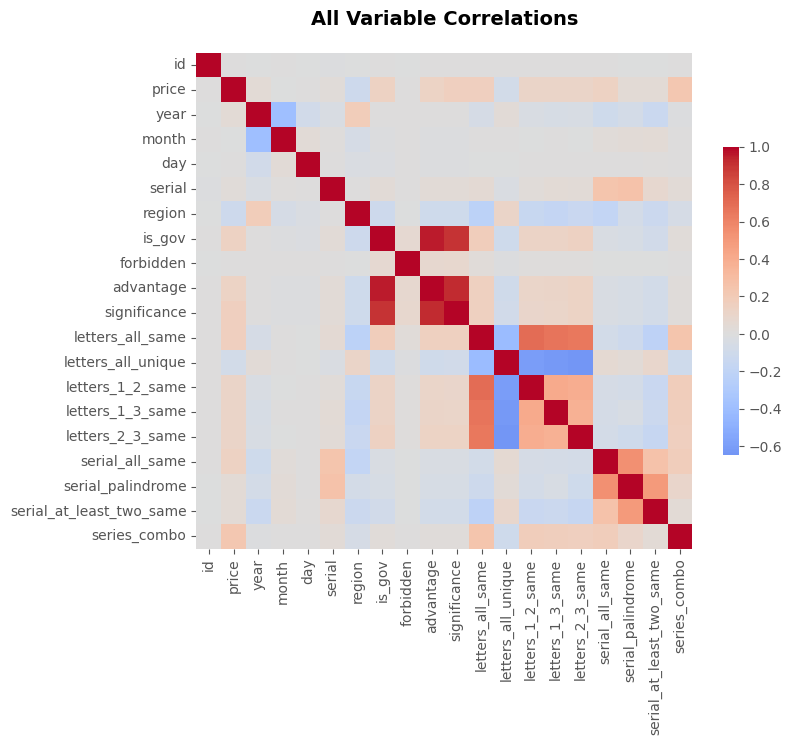

In [395]:
# ====================================================
# Numerical Only Correlation Analysis
# ====================================================
numerical_columns = df.drop(columns=["plate", "letter_code", "region_name"])

correlation_matrix = numerical_columns.corr()


# Plot for Weak Correlations
plt.figure(figsize=(8, 8))
ax3 = sns.heatmap(
    correlation_matrix,
    cmap="coolwarm",
    vmax=1,
    center=0,
    square=True,
    linewidths=0,
    cbar_kws={"shrink": 0.5},
    mask=correlation_matrix.isnull(),
)
plt.title("All Variable Correlations", fontsize=14, fontweight="bold", pad=20)
# plt.savefig(os.path.join(folder_name, "all_correlations.png"), bbox_inches="tight")
plt.show()

The variable id is approximately symmetric (skewness = 0.00)


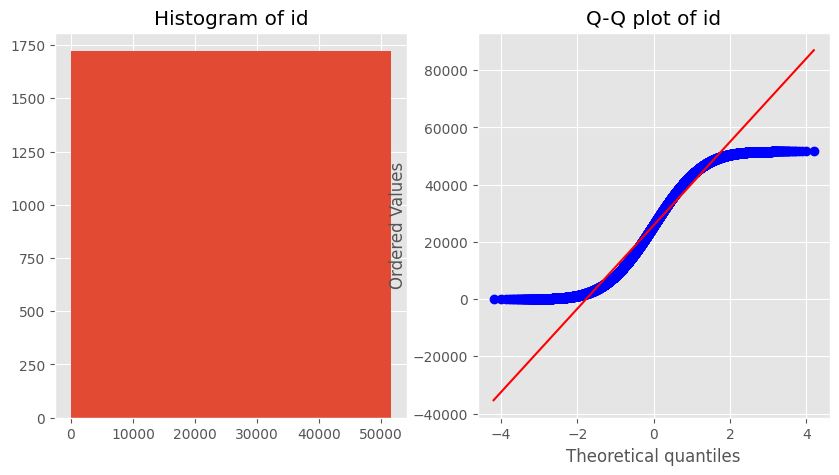

The variable price is positively skewed (skewness = 26.39)


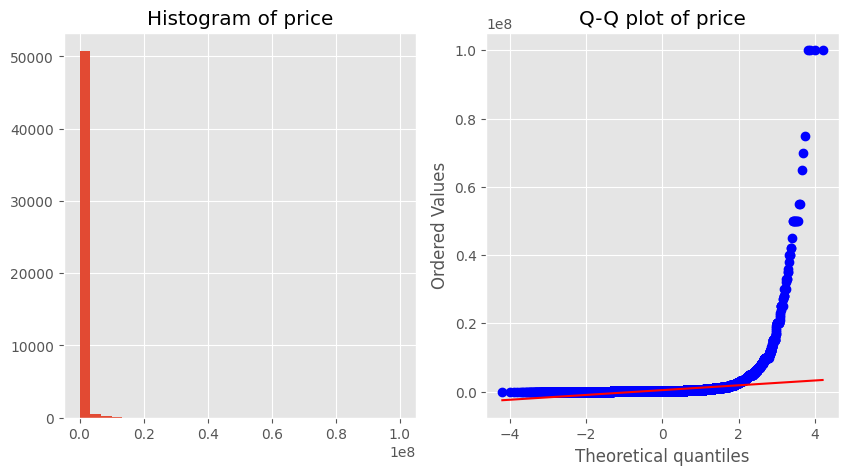

The variable year is negatively skewed (skewness = -0.60)


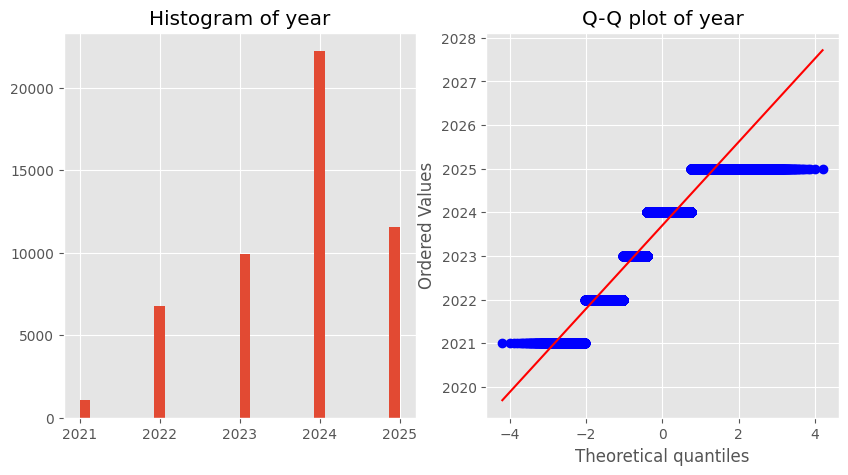

The variable month is positively skewed (skewness = 0.13)


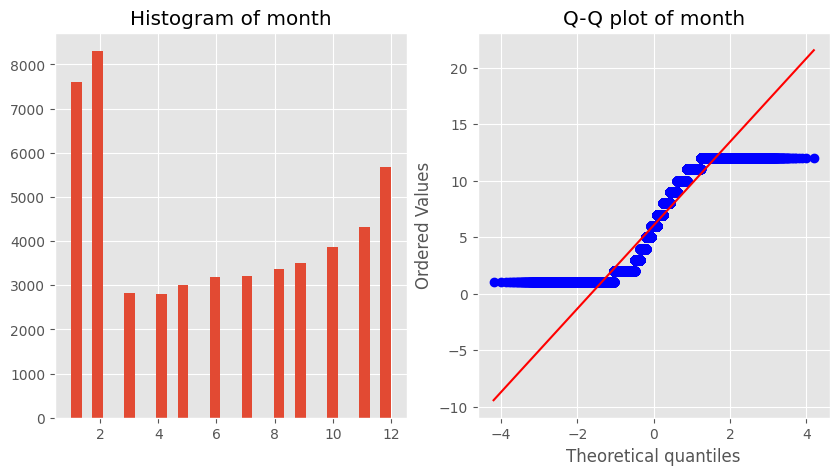

The variable day is positively skewed (skewness = 0.17)


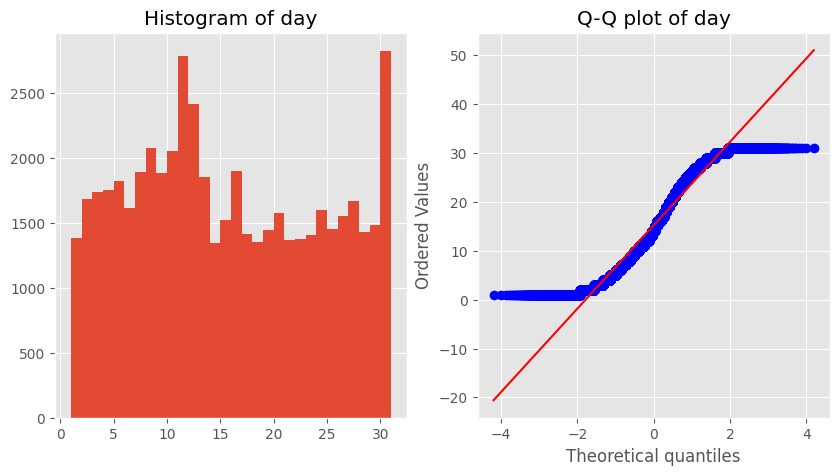

The variable serial is positively skewed (skewness = 0.21)


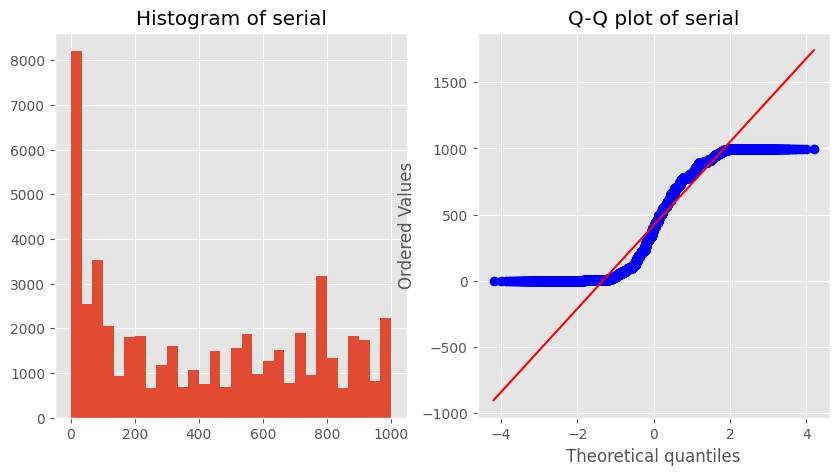

The variable region is positively skewed (skewness = 0.21)


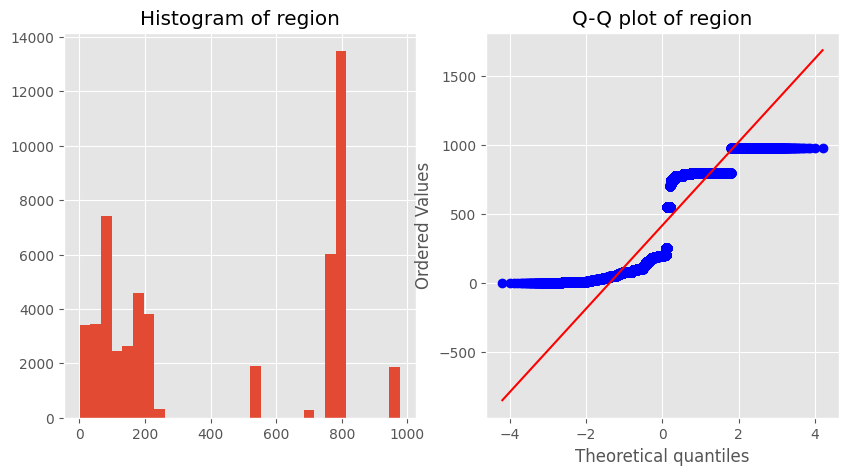

The variable is_gov is positively skewed (skewness = 8.66)


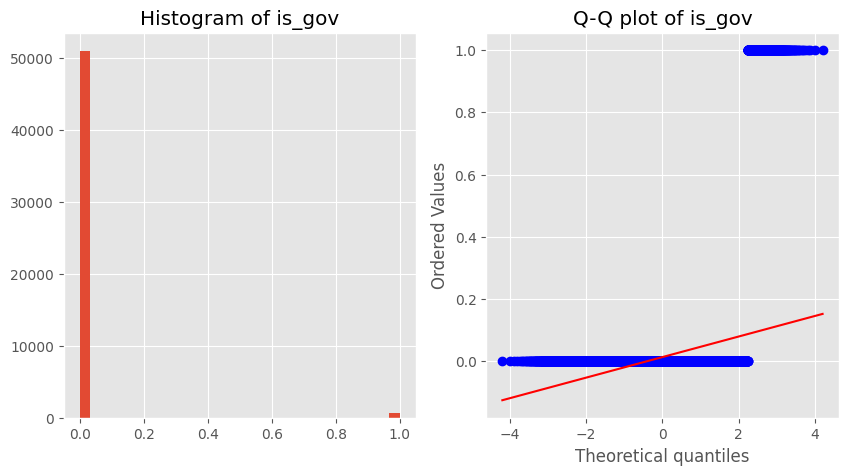

The variable forbidden is positively skewed (skewness = 131.19)


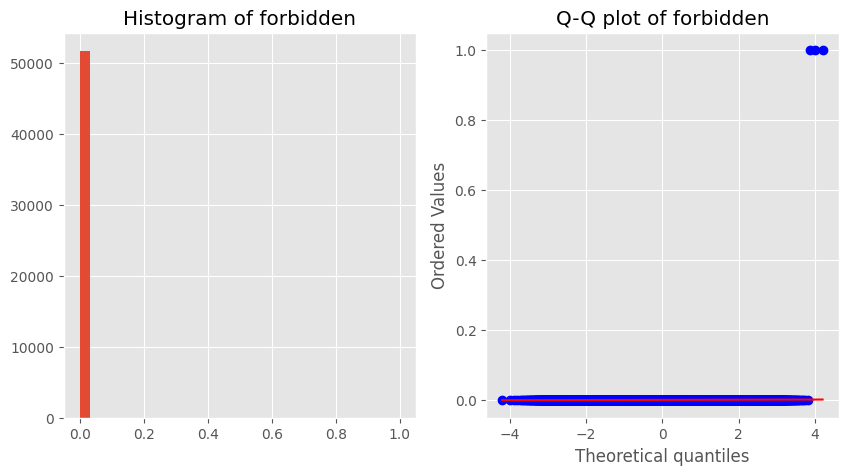

The variable advantage is positively skewed (skewness = 9.13)


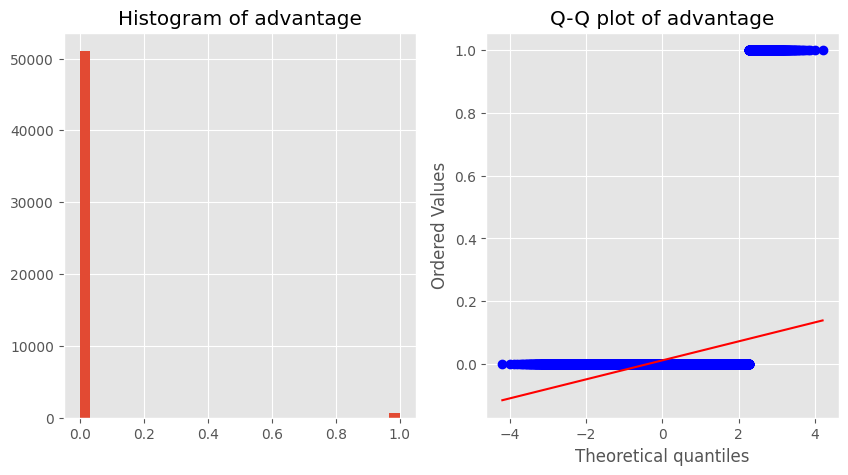

The variable significance is positively skewed (skewness = 11.19)


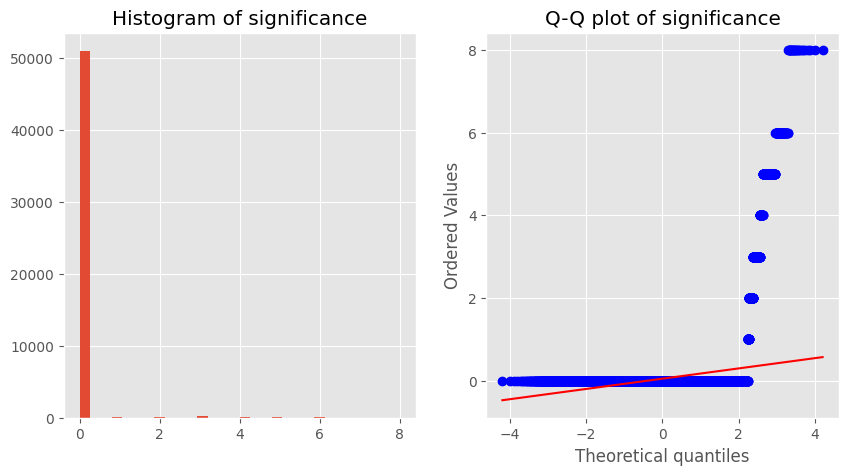

The variable letters_all_same is positively skewed (skewness = 2.88)


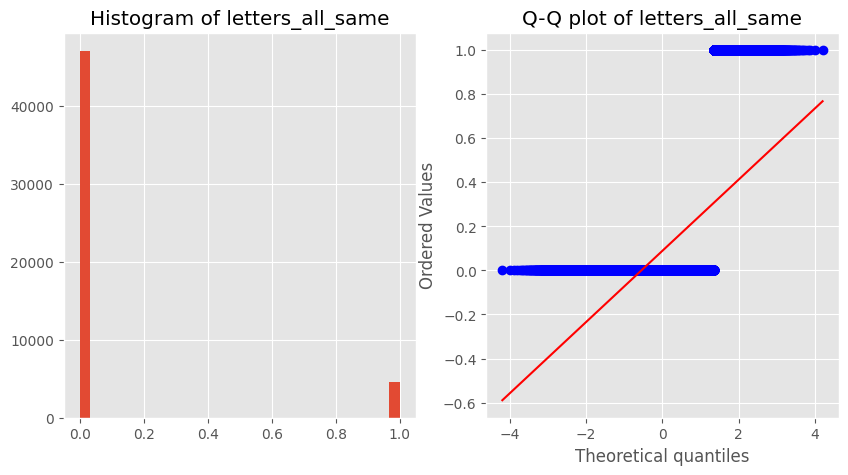

The variable letters_all_unique is negatively skewed (skewness = -0.59)


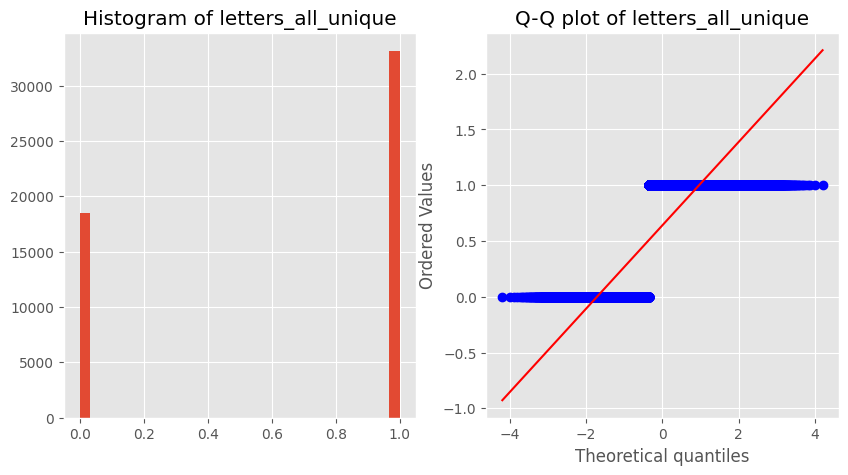

The variable letters_1_2_same is positively skewed (skewness = 1.76)


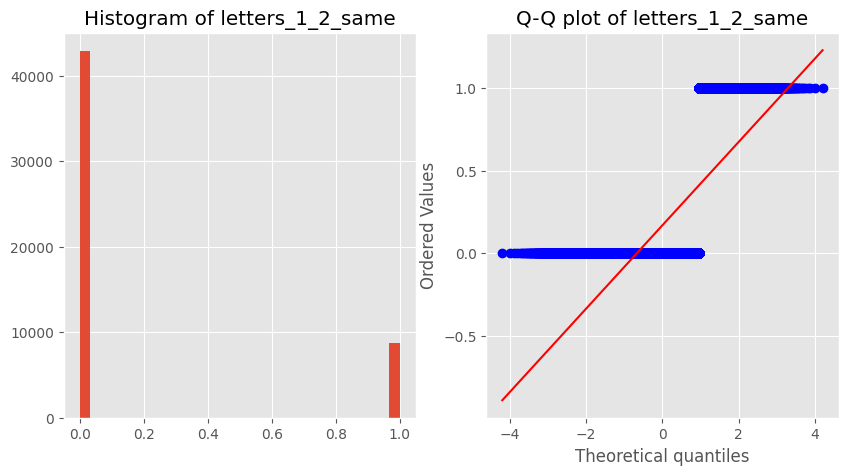

The variable letters_1_3_same is positively skewed (skewness = 1.67)


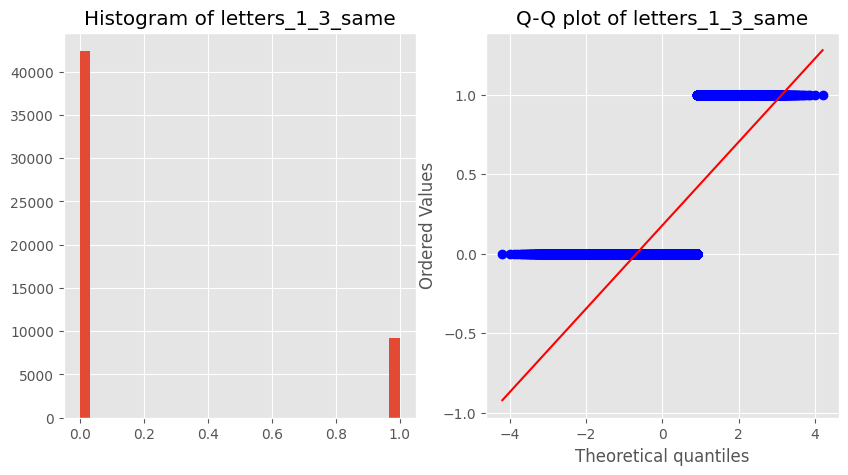

The variable letters_2_3_same is positively skewed (skewness = 1.59)


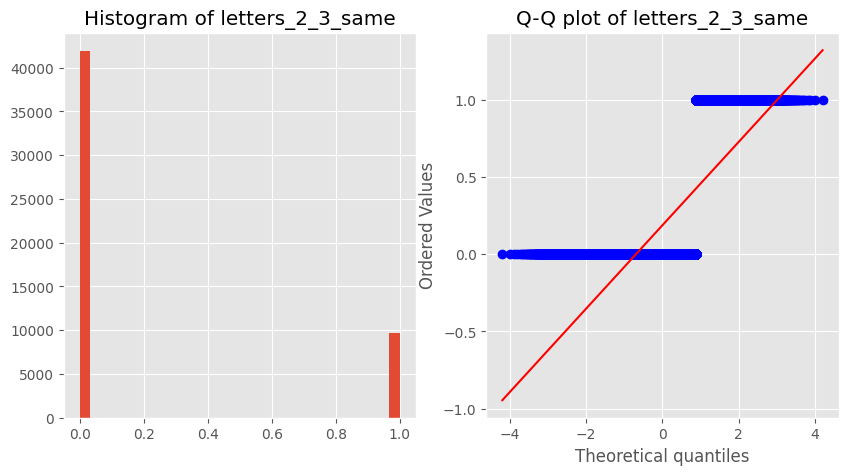

The variable serial_all_same is positively skewed (skewness = 1.83)


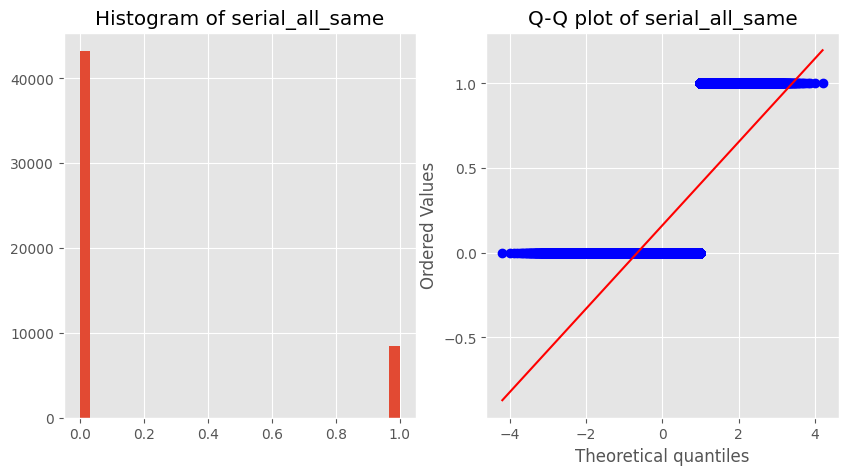

The variable serial_palindrome is positively skewed (skewness = 0.41)


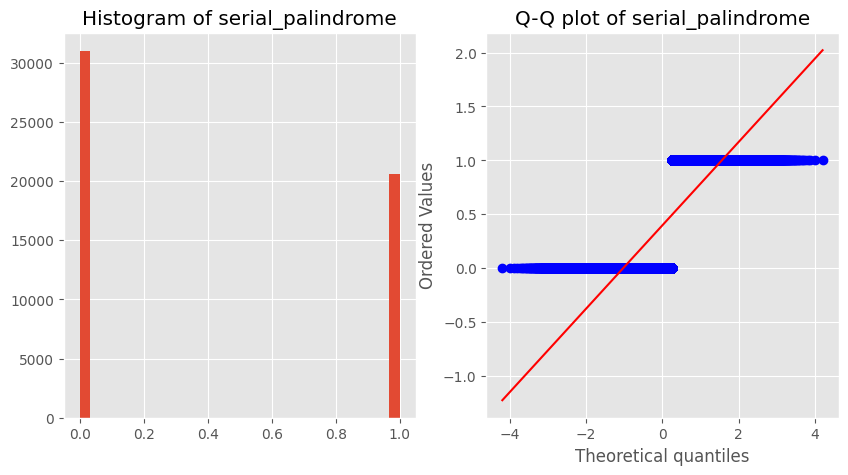

The variable serial_at_least_two_same is negatively skewed (skewness = -1.05)


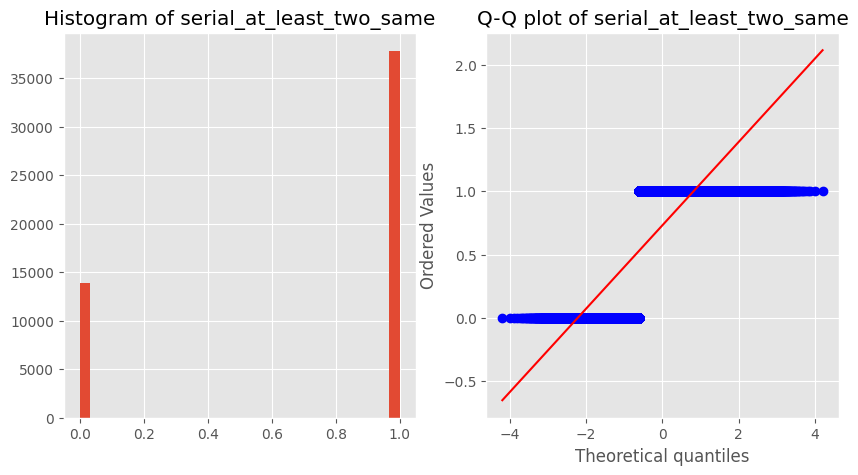

The variable series_combo is positively skewed (skewness = 12.81)


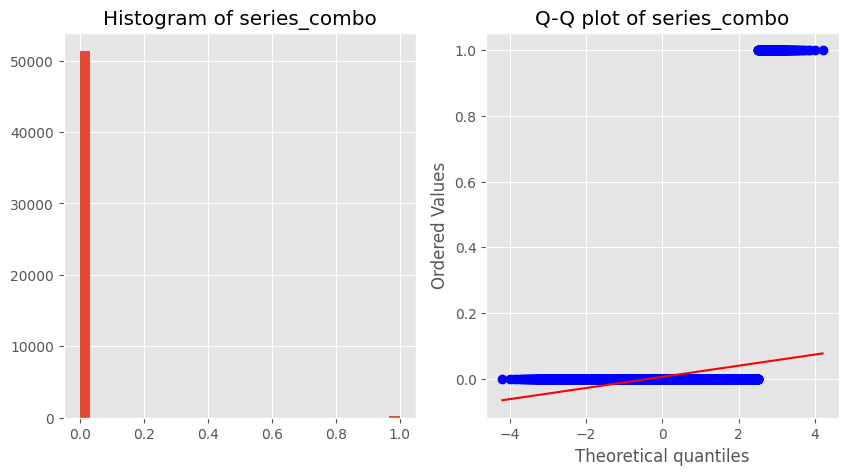

In [396]:
def diagnostic_plots(df):
    # Create directory for diagnostic plots if it doesn't exist
    dir_path = "diagnostic_plots"
    os.makedirs(dir_path, exist_ok=True)

    # Helper function to sanitize filenames
    def sanitize_filename(name):
        # Replace any character that's not alphanumeric, underscore, or dash with an underscore.
        return re.sub(r"[^\w\-]", "_", name)

    # Loop over each column in the DataFrame
    for variable in df.columns:
        safe_variable = sanitize_filename(variable)
        plt.figure(figsize=(10, 5))

        # Histogram
        plt.subplot(1, 2, 1)
        df[variable].hist(bins=30)
        plt.title(f"Histogram of {variable}")

        # Q-Q plot
        plt.subplot(1, 2, 2)
        stats.probplot(df[variable], dist="norm", plot=plt)
        plt.title(f"Q-Q plot of {variable}")

        # Check for skewness
        skewness = df[variable].skew()
        if skewness > 0:
            skew_type = "positively skewed"
        elif skewness < 0:
            skew_type = "negatively skewed"
        else:
            skew_type = "approximately symmetric"

        # Print message indicating skewness type
        print(f"The variable {variable} is {skew_type} (skewness = {skewness:.2f})")

        # Save the plot in the created directory with a unique filename
        # filename = os.path.join(dir_path, f"diagnostic_plots_{safe_variable}.png")
        # plt.savefig(filename)
        # print(f"Plot saved as {filename}")

        plt.show()


diagnostic_plots(numerical_columns)

In [397]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PowerTransformer

# 1. Original skew
orig_skew = numerical_columns["price"].skew()
print(f"Skewness before: {orig_skew:.2f}")

# 2. Fit & apply Box–Cox via scikit-learn
pt = PowerTransformer(method="box-cox", standardize=False)
# ensure strictly positive
price_reshaped = numerical_columns[["price"]].clip(lower=1e-6)

numerical_columns["price"] = pt.fit_transform(price_reshaped)
lambda_ = pt.lambdas_[0]
print(f"Optimal λ (sklearn): {lambda_:.4f}")

# 3. Transformed skew
new_skew = numerical_columns["price"].skew()
print(f"Skewness after : {new_skew:.2f}")

Skewness before: 26.39
Optimal λ (sklearn): -0.2185
Skewness after : 0.04


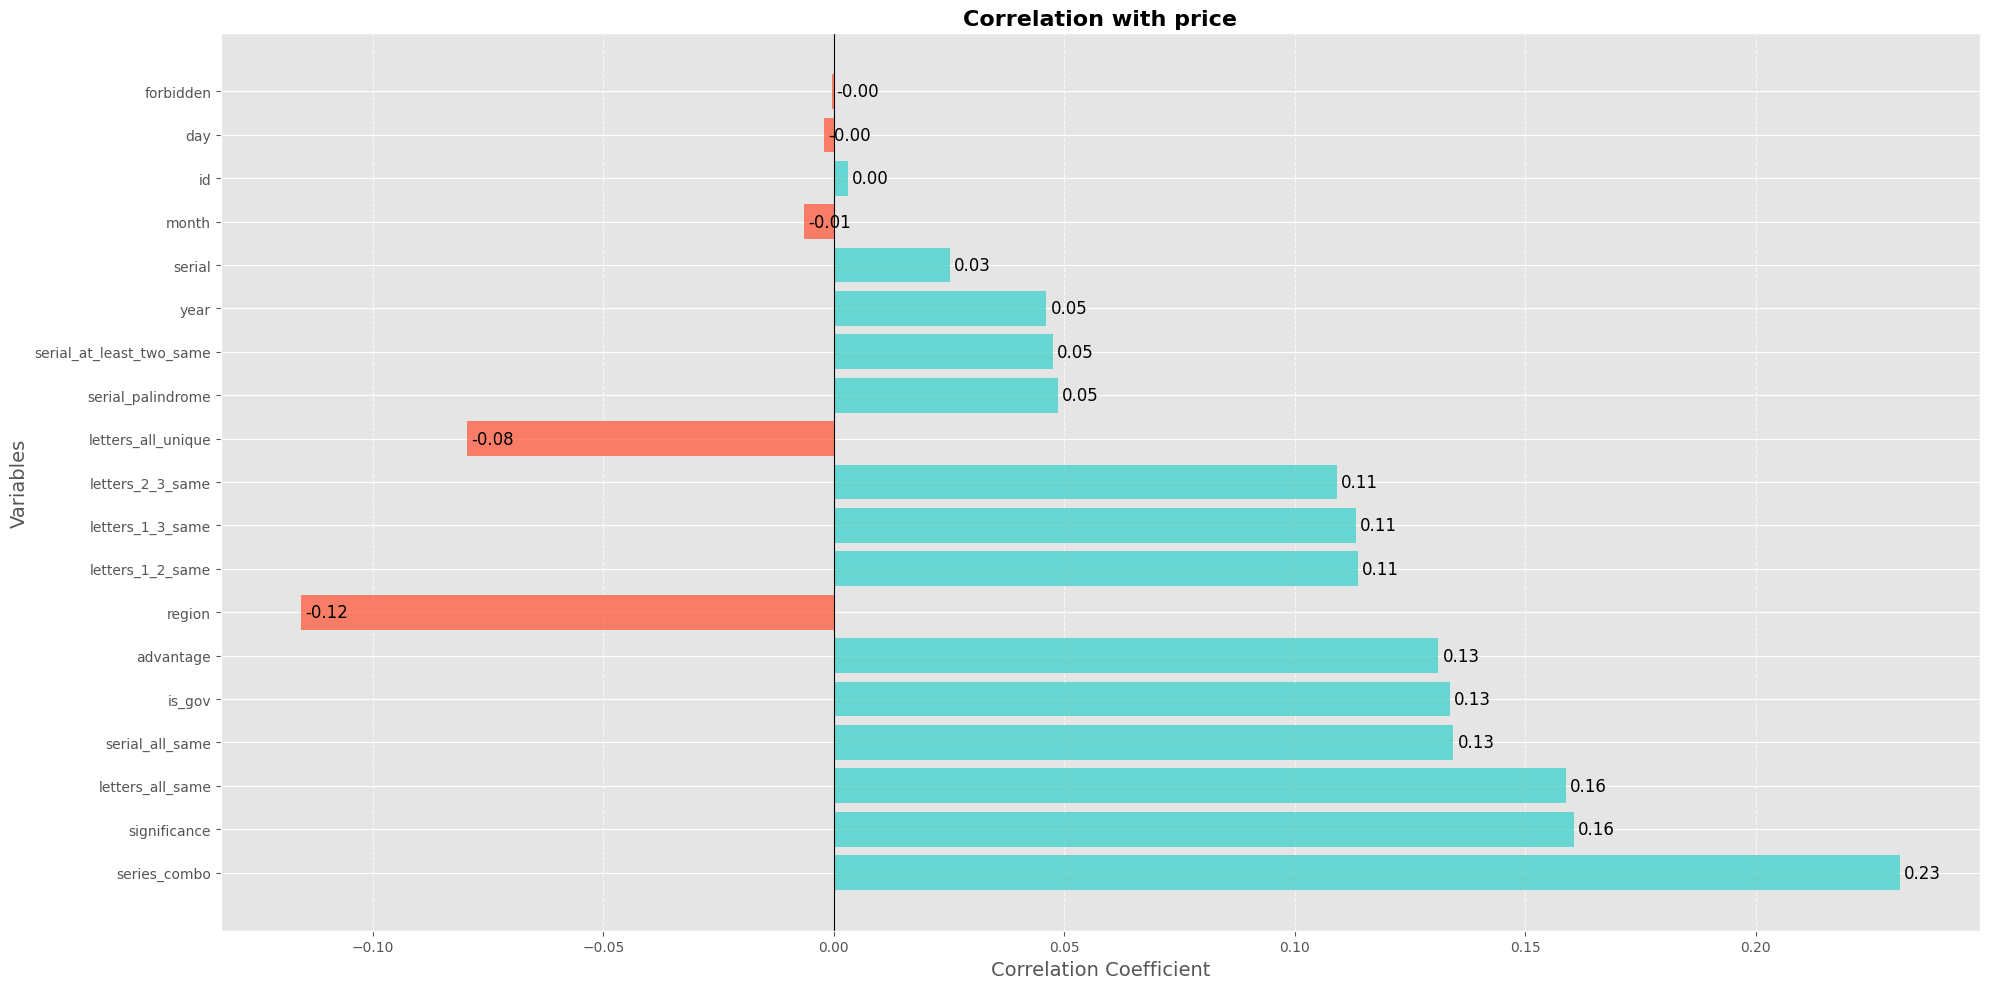

In [398]:
def plot_target_correlation_bar(corr_matrix, target, filename, top_n=None):
    # Check if the target variable exists in the correlation matrix
    if target not in corr_matrix.columns:
        raise ValueError(
            f"Target variable '{target}' not found in the correlation matrix."
        )

    # Extract correlations with the target variable (excluding self-correlation)
    corr_series = corr_matrix[target].drop(target)

    # Optionally, sort by absolute correlation and select top_n variables
    corr_series = corr_series.reindex(
        corr_series.abs().sort_values(ascending=False).index
    )
    if top_n is not None:
        corr_series = corr_series.head(top_n)

    # Apply a pleasing style
    plt.style.use("ggplot")
    fig, ax = plt.subplots(figsize=(20, 10))

    # Differentiate positive and negative correlations with colors
    colors = ["mediumturquoise" if val > 0 else "tomato" for val in corr_series]
    bars = ax.barh(corr_series.index, corr_series, color=colors, alpha=0.8)

    # Add title and labels with improved font sizes
    ax.set_title(f"Correlation with {target}", fontsize=16, fontweight="bold")
    ax.set_xlabel("Correlation Coefficient", fontsize=14)
    ax.set_ylabel("Variables", fontsize=14)

    # Add a grid and a vertical line at 0 for reference
    ax.grid(axis="x", linestyle="--", alpha=0.7)
    ax.axvline(0, color="black", linewidth=0.8)

    # Annotate each bar with its correlation value
    for bar in bars:
        width = bar.get_width()
        ax.annotate(
            f"{width:.2f}",
            xy=(width, bar.get_y() + bar.get_height() / 2),
            xytext=(3, 0),  # offset text by 3 points to the right of the bar
            textcoords="offset points",
            ha="left",
            va="center",
            fontsize=12,
        )

    plt.tight_layout()
    # plt.savefig(os.path.join(folder_name, filename), bbox_inches="tight")
    plt.show()


target_variable = "price"
plot_target_correlation_bar(
    correlation_matrix, target_variable, "target_correlation_bar", top_n=20
)

In [399]:
numerical_columns

,id,price,year,month,day,serial,region,is_gov,forbidden,advantage,significance,letters_all_same,letters_all_unique,letters_1_2_same,letters_1_3_same,letters_2_3_same,serial_all_same,serial_palindrome,serial_at_least_two_same,series_combo
0,1,4.169705,2024,12,26,59,797,0,0,0,0,0,1,0,0,0,0,0,0,0
1,2,4.206194,2024,7,12,800,790,0,0,0,0,0,1,0,0,0,0,0,1,0
2,3,4.282928,2024,4,18,212,77,0,0,0,0,0,1,0,0,0,0,1,1,0
3,4,4.332700,2025,1,3,1,199,0,0,0,0,0,1,0,0,0,0,0,1,0
4,5,4.337850,2025,1,10,1,199,0,0,0,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51630,51631,4.176229,2025,1,29,23,797,0,0,0,0,0,0,0,0,1,0,0,0,0
51631,51632,4.374166,2025,1,31,4,161,0,0,0,0,0,1,0,0,0,0,0,1,0
51632,51633,4.344271,2025,2,6,888,199,0,0,0,0,0,0,1,0,0,1,1,1,0
51633,51634,4.237538,2024,4,24,23,77,0,0,0,0,0,0,1,0,0,0,0,0,0


In [404]:
numerical_columns = numerical_columns.drop(columns=["id","forbidden","series_combo","is_gov","significance","letters_1_2_same","letters_1_3_same","advantage","letters_2_3_same","letters_all_unique"])

In [405]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor


X = numerical_columns.drop(columns="price")
y = numerical_columns["price"]

X_tr, X_val, y_tr, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [406]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np


# 1) SMAPE metric
def smape(y_true, y_pred):
    # avoid division by zero by adding a tiny epsilon
    denom = np.abs(y_true) + np.abs(y_pred)
    diff = np.abs(y_pred - y_true)
    # where denom is zero, set SMAPE contribution to 0
    mask = denom == 0
    smape_vals = np.zeros_like(diff)
    smape_vals[~mask] = 2 * diff[~mask] / denom[~mask]
    return 100 * np.mean(smape_vals)


# 2) Train Random Forest
rf = RandomForestRegressor(n_estimators=200, max_depth=None, random_state=42, n_jobs=-1)
rf.fit(X_tr, y_tr)

# 3) Predict and evaluate
y_pred = rf.predict(X_val)
print(f"Validation SMAPE: {smape(y_val.values, y_pred):.2f}%")

Validation SMAPE: 0.82%


In [407]:
# 1. Get raw importances (array aligned with X’s columns)
importances = rf.feature_importances_

# 2. Map to feature names and sort descending
feat_imp = pd.Series(importances, index=X_tr.columns)
feat_imp = feat_imp.sort_values(ascending=False)

# 3. Print them
print("Feature importances:")
print(feat_imp)

Feature importances:
region                      0.344195
serial                      0.239659
day                         0.106107
serial_all_same             0.081265
month                       0.067954
letters_all_same            0.062087
year                        0.057597
serial_at_least_two_same    0.028272
serial_palindrome           0.012863
dtype: float64


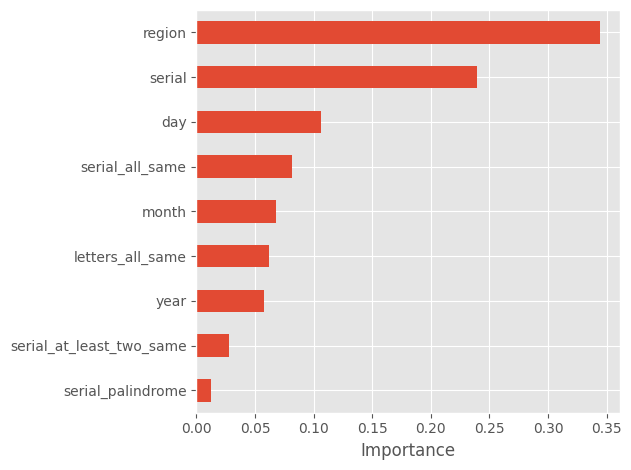

In [408]:
import matplotlib.pyplot as plt

feat_imp.head(20).plot.barh()
plt.xlabel("Importance")
plt.gca().invert_yaxis()  # highest at top
plt.tight_layout()
plt.show()

#Testing

In [440]:
# Replace with your actual file path
csv_path = "russian-car-plates-prices-prediction/test.csv"

# Read the CSV into a DataFrame
df = pd.read_csv(csv_path)

df

,id,plate,date,price
0,51636,P700TT790,2025-01-27 00:00:00,NaN
1,51637,M081TX797,2025-02-10 00:00:00,NaN
2,51638,T333HX777,2025-02-11 00:00:00,NaN
3,51639,H744BH977,2025-02-03 00:00:00,NaN
4,51640,X066EM777,2025-02-12 00:00:00,NaN
...,...,...,...,...
7690,59326,X799CC799,2023-03-13 00:00:00,NaN
7691,59327,K077YT777,2022-10-19 00:00:00,NaN
7692,59328,O200PA777,2023-10-02 19:19:30,NaN
7693,59329,O073OO97,2025-01-12 00:00:00,NaN


In [441]:
df_id = df[["id"]]

In [442]:
df["date"] = pd.to_datetime(df["date"])
df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month
df["day"] = df["date"].dt.day

In [443]:
df["plate"] = df["plate"].astype(str)
df = df.drop(columns=["date"])
df["plate"] = df["plate"].str.upper().str.strip()

In [444]:
# apply to DataFrame
df[["letter_code", "serial", "region"]] = df["plate"].apply(
    lambda p: pd.Series(extract_plate_components(p))
)

In [445]:
df["region_name"] = df["region"].map(code_to_region).fillna("Unknown")

In [446]:
df[["is_gov", "forbidden", "advantage", "significance"]] = df.apply(
    gov_metadata, axis=1
)

In [447]:
df["serial"] = df["serial"].astype(int).astype(str).str.zfill(3)
df["region"] = df["region"].astype(int).astype(str).str.zfill(3)

In [448]:
df["letters_all_same"] = df["letter_code"].apply(lambda s: len(set(s)) == 1).astype(int)
df["letters_all_unique"] = (
    df["letter_code"].apply(lambda s: len(set(s)) == 3).astype(int)
)
df["letters_1_2_same"] = df["letter_code"].apply(lambda s: s[0] == s[1]).astype(int)
df["letters_1_3_same"] = df["letter_code"].apply(lambda s: s[0] == s[2]).astype(int)
df["letters_2_3_same"] = df["letter_code"].apply(lambda s: s[1] == s[2]).astype(int)

In [449]:
df["serial_all_same"] = df["serial"].apply(lambda s: len(set(s)) == 1).astype(int)
df["serial_palindrome"] = df["serial"].apply(lambda s: s == s[::-1]).astype(int)
df["serial_at_least_two_same"] = (
    df["serial"]
    .apply(lambda s: (s[0] == s[1]) or (s[0] == s[2]) or (s[1] == s[2]))
    .astype(int)
)

In [450]:
df["series_combo"] = df["letters_all_same"] & df["serial_all_same"]

In [451]:
df["serial"] = df["serial"].astype(int)
df["region"] = df["region"].astype(int)

In [452]:
df

,id,plate,price,year,month,day,letter_code,serial,region,region_name,...,significance,letters_all_same,letters_all_unique,letters_1_2_same,letters_1_3_same,letters_2_3_same,serial_all_same,serial_palindrome,serial_at_least_two_same,series_combo
0,51636,P700TT790,NaN,2025,1,27,PTT,700,790,Moscow Oblast,...,0,0,0,0,0,1,0,0,1,0
1,51637,M081TX797,NaN,2025,2,10,MTX,81,797,Moscow,...,0,0,1,0,0,0,0,0,0,0
2,51638,T333HX777,NaN,2025,2,11,THX,333,777,Moscow,...,0,0,1,0,0,0,1,1,1,0
3,51639,H744BH977,NaN,2025,2,3,HBH,744,977,Moscow,...,0,0,0,0,1,0,0,0,1,0
4,51640,X066EM777,NaN,2025,2,12,XEM,66,777,Moscow,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7690,59326,X799CC799,NaN,2023,3,13,XCC,799,799,Moscow,...,0,0,0,0,0,1,0,0,1,0
7691,59327,K077YT777,NaN,2022,10,19,KYT,77,777,Moscow,...,0,0,1,0,0,0,0,0,1,0
7692,59328,O200PA777,NaN,2023,10,2,OPA,200,777,Moscow,...,0,0,1,0,0,0,0,0,1,0
7693,59329,O073OO97,NaN,2025,1,12,OOO,73,97,Moscow,...,0,1,0,1,1,1,0,0,0,0


In [453]:

df = df.drop(columns=["letter_code","plate","region_name"])

df = df.drop(columns=["id","forbidden","series_combo","is_gov","significance","letters_1_2_same","letters_1_3_same","advantage","letters_2_3_same","letters_all_unique"])


In [454]:
X = df.drop(columns="price")
y_pred = rf.predict(X)

In [455]:
y_pred

array([4.25060001, 4.15847304, 4.3434789 , ..., 4.23511108, 4.40958803,
       4.28556255])

In [456]:
print("X:", X.shape)
print("y_pred:", y_pred.shape)

X: (7695, 9)
y_pred: (7695,)


In [457]:
y_pred_df = pd.DataFrame(y_pred, columns=["price"])

y_pred_orig = pt.inverse_transform(y_pred_df).flatten()
y_pred_orig

array([ 179614.92599912,   57371.83674987,  836814.70091751, ...,
        145172.41733939, 3872414.53353708,  302241.92412389])

In [458]:
predictions_df = pd.DataFrame({"id": df_id["id"], "price": y_pred_orig})

In [459]:
predictions_df

,id,price
0,51636,1.796149e+05
1,51637,5.737184e+04
2,51638,8.368147e+05
3,51639,1.093849e+05
4,51640,1.977572e+05
...,...,...
7690,59326,3.110460e+05
7691,59327,2.848459e+05
7692,59328,1.451724e+05
7693,59329,3.872415e+06


In [460]:
predictions_df.to_csv("/content/drive/Othercomputers/Vignesh MacBook Air/Kaggle-Comp-1/predictions2.csv", index=False)